<a href="https://colab.research.google.com/github/RajezMariner/Deep_Learning/blob/master/Teddy_Bear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import drive
drive.mount('/content/drive')

from pathlib import PosixPath

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

!ls drive/My\ Drive/fastai

data


In [ ]:
path = PosixPath("/content/drive/My Drive/fastai/data/bears/")

In [ ]:
path.ls

<bound method <lambda> of PosixPath('/content/drive/My Drive/fastai/data/bears')>

In [ ]:
folder = 'black'
file = 'black_bear_urls.txt'

In [ ]:
folder = 'grizzly'
file = 'grizzly_bear_urls.txt'

In [ ]:
folder = 'teddy'
file = 'teddy_bear_urls.txt'

In [ ]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/folder/file, dest, max_pics=200)

In [ ]:
import numpy as np
np.random.seed(2)
data = ImageDataBunch.from_folder(path=path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: /content/drive/My Drive/fastai/data/bears;

Valid: LabelList (120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,grizzly,grizzly,teddy,grizzly
Path: /content/drive/My Drive/fastai/data/bears;

Test: None

In [ ]:
data.classes

['black', 'grizzly', 'teddy']

In [ ]:
data.c

3

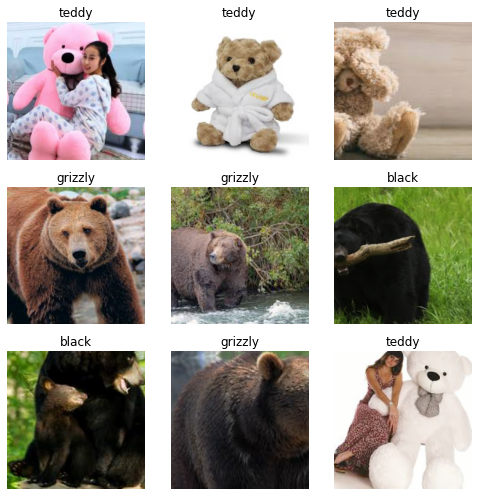

In [ ]:
data.show_batch(rows=3, figsize=(7,7))

In [ ]:
data.train_ds

LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: /content/drive/My Drive/fastai/data/bears

In [ ]:
data.valid_ds

LabelList (120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,grizzly,grizzly,teddy,grizzly
Path: /content/drive/My Drive/fastai/data/bears

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.data

ImageDataBunch;

Train: LabelList (480 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
grizzly,grizzly,grizzly,grizzly,grizzly
Path: /content/drive/My Drive/fastai/data/bears;

Valid: LabelList (120 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,grizzly,grizzly,teddy,grizzly
Path: /content/drive/My Drive/fastai/data/bears;

Test: None

In [ ]:
learn.metrics

[<function fastai.metrics.error_rate>]

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace=True)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace=True)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, mom

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.005116,0.082067,0.033333,01:13
1,0.552841,0.047667,0.016667,00:08
2,0.388969,0.038126,0.025000,00:08
3,0.286483,0.040830,0.033333,00:08


In [ ]:
learn.save('stage-1')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


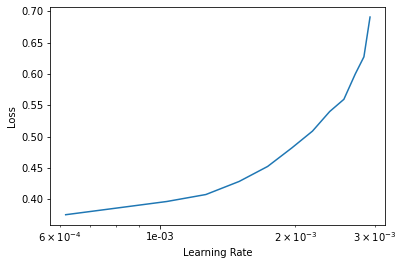

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-6, 3e-02))

epoch,train_loss,valid_loss,error_rate,time
0,0.166049,0.181950,0.041667,00:08
1,0.185936,0.464276,0.058333,00:08


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
loss, idx = interp.top_losses()

In [ ]:
top_loss_paths = data.valid_ds.x[idx]

In [ ]:
top_loss_paths

ImageList (120 items)
Image (3, 183, 275),Image (3, 183, 275),Image (3, 251, 201),Image (3, 168, 300),Image (3, 194, 259)
Path: /content/drive/My Drive/fastai/data/bears

In [ ]:
from fastai.widgets import *

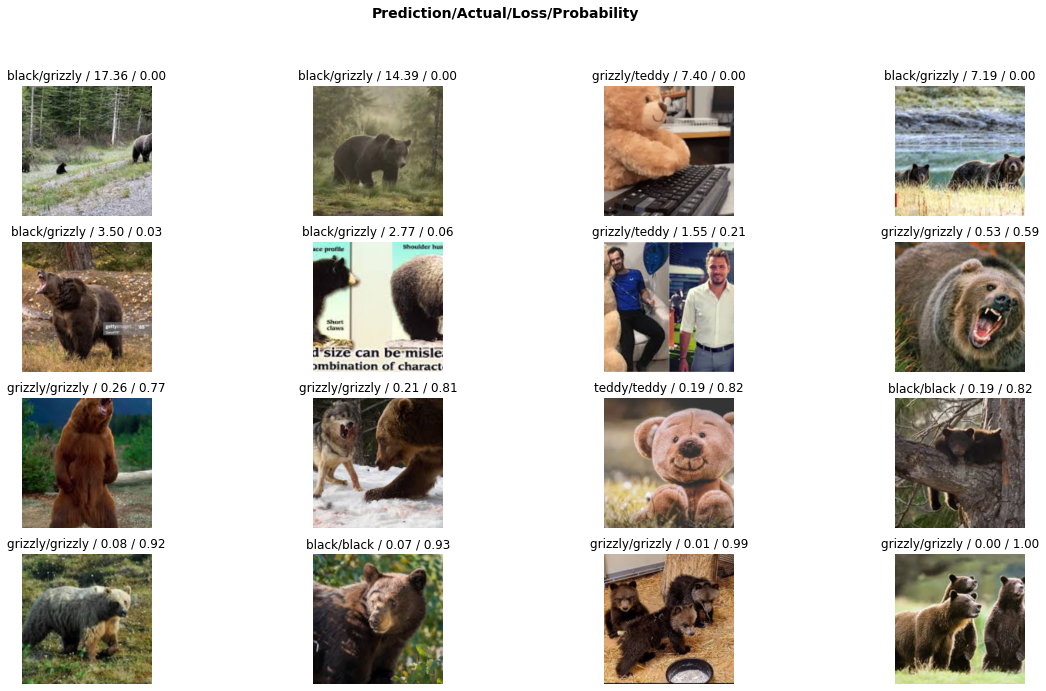

In [ ]:
interp.plot_top_losses(16, figsize=(20,11))

In [ ]:
interp.confusion_matrix()

array([[31,  0,  0],
       [ 5, 41,  0],
       [ 0,  2, 41]])

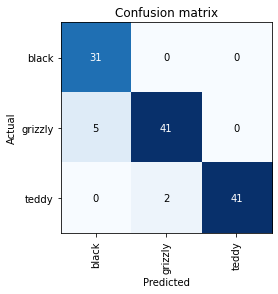

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,18.591724,1045386048.000000,0.741667,00:08


High Learning rate

In [ ]:
learn = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,24.674679,481331680.000000,0.616667,00:08


Medium Learning Rate

In [ ]:
learn = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)
learn.fit_one_cycle(1, max_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.116346,10.708284,0.625000,00:08


Very Low learning rate

In [ ]:
learn = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)
learn.fit_one_cycle(1, max_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.260798,64.967850,0.641667,00:08


In [ ]:
learn = cnn_learner(data=data, base_arch=models.resnet34, metrics=error_rate)
learn.fit_one_cycle(8, max_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.779187,0.082176,0.041667,00:08
1,0.476327,0.172459,0.033333,00:08
2,0.369192,0.263795,0.091667,00:07
3,0.301348,0.641926,0.141667,00:08
4,0.255272,0.050820,0.016667,00:08
5,0.210767,0.035456,0.008333,00:08
6,0.195366,0.019112,0.008333,00:08
7,0.170449,0.019546,0.008333,00:08


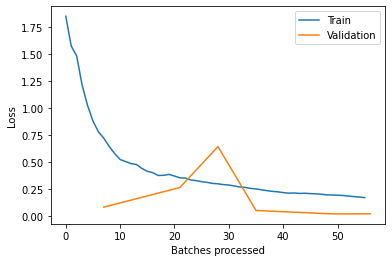

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.predict??